In [2]:
 # Load the dataset
import pandas as pd
data = pd.read_csv(r"C:\Users\Sandhya\OneDrive\Desktop\Data Analyst Job Analysis\DataAnalyst.csv")

In [4]:
 data.head()

id                                          Job Title  \
0   1  Data Analyst, Center on Immigration and Justic...   
1   2                               Quality Data Analyst   
2   3  Senior Data Analyst, Insights & Analytics Team...   
3   4                                       Data Analyst   
4   5                             Reporting Data Analyst   

              Salary Estimate  \
0  $37K-$66K (Glassdoor est.)   
1  $37K-$66K (Glassdoor est.)   
2  $37K-$66K (Glassdoor est.)   
3  $37K-$66K (Glassdoor est.)   
4  $37K-$66K (Glassdoor est.)   

                                     Job Description  Rating  \
0  Are you eager to roll up your sleeves and harn...     3.2   
1  Overview\n\nProvides analytical and technical ...     3.8   
2  We’re looking for a Senior Data Analyst who ha...     3.4   
3  Requisition NumberRR-0001939\nRemote:Yes\nWe c...     4.1   
4  ABOUT FANDUEL GROUP\n\nFanDuel Group is a worl...     3.9   

                              Company Name      Location  Headquarters  \
0           Vera Institute of Justice\n3.2  New York, NY  New York, NY   
1  Visiting Nurse Service of New York\n3.8  New York, NY  New York, NY   
2                         Squarespace\n3.4  New York, NY  New York, NY   
3                            Celerity\n4.1  New York, NY    McLean, VA   
4                             FanDuel\n3.9  New York, NY  New York, NY   

                     Size  Founded               Type of ownership  \
0    201 to 500 employees     1961          Nonprofit Organization   
1        10000+ employees     1893          Nonprofit Organization   
2  1001 to 5000 employees     2003               Company - Private   
3    201 to 500 employees     2002  Subsidiary or Business Segment   
4   501 to 1000 employees     2009               Company - Private   

                           Industry                            Sector  \
0                 Social Assistance                        Non-Profit   
1  Health Care Services & Hospitals                       Health Care   
2                          Internet            Information Technology   
3                       IT Services            Information Technology   
4               Sports & Recreation  Arts, Entertainment & Recreation   

                      Revenue Competitors Easy Apply  
0  $100 to $500 million (USD)          -1       TRUE  
1      $2 to $5 billion (USD)          -1         -1  
2    Unknown / Non-Applicable     GoDaddy         -1  
3   $50 to $100 million (USD)          -1         -1  
4  $100 to $500 million (USD)  DraftKings       TRUE

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2253 entries, 0 to 2252
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 2253 non-null   int64  
 1   Job Title          2253 non-null   object 
 2   Salary Estimate    2253 non-null   object 
 3   Job Description    2253 non-null   object 
 4   Rating             2253 non-null   float64
 5   Company Name       2252 non-null   object 
 6   Location           2253 non-null   object 
 7   Headquarters       2253 non-null   object 
 8   Size               2253 non-null   object 
 9   Founded            2253 non-null   int64  
 10  Type of ownership  2253 non-null   object 
 11  Industry           2253 non-null   object 
 12  Sector             2253 non-null   object 
 13  Revenue            2253 non-null   object 
 14  Competitors        2253 non-null   object 
 15  Easy Apply         2253 non-null   object 
dtypes: float64(1), int64(2),

In [7]:
 # Check for duplicates
print(f"Duplicate rows: {data.duplicated().sum()}")

Duplicate rows: 0


In [8]:
 # General statistics
 print(data.describe(include='all'))

               id     Job Title             Salary Estimate  \
count   2253.0000          2253                        2253   
unique        NaN          1272                          90   
top           NaN  Data Analyst  $42K-$76K (Glassdoor est.)   
freq          NaN           405                          57   
mean    1127.0000           NaN                         NaN   
std      650.5294           NaN                         NaN   
min        1.0000           NaN                         NaN   
25%      564.0000           NaN                         NaN   
50%     1127.0000           NaN                         NaN   
75%     1690.0000           NaN                         NaN   
max     2253.0000           NaN                         NaN   

                                          Job Description       Rating  \
count                                                2253  2253.000000   
unique                                               2253          NaN   
top     Are you eager

In [12]:
 # Check missing values
 print(data.isnull().sum())

id                   0
Job Title            0
Salary Estimate      0
Job Description      0
Rating               0
Company Name         1
Location             0
Headquarters         0
Size                 0
Founded              0
Type of ownership    0
Industry             0
Sector               0
Revenue              0
Competitors          0
Easy Apply           0
dtype: int64


In [14]:
 # Value counts for categorical columns
 for col in ['Job Title', 'Type of ownership', 'Industry',
            'Sector', 'Revenue', 'Employer Provided Benefits']:
    print(col)

Job Title
Type of ownership
Industry
Sector
Revenue
Employer Provided Benefits


In [23]:
 # Extract minimum salary
 data['Min Salary'] = data['Salary Estimate'].str.extract(r'(\d+)').astype(float)

In [25]:
print(data.columns)

Index(['id', 'Job Title', 'Salary Estimate', 'Job Description', 'Rating',
       'Company Name', 'Location', 'Headquarters', 'Size', 'Founded',
       'Type of ownership', 'Industry', 'Sector', 'Revenue', 'Competitors',
       'Easy Apply', 'Min Salary'],
      dtype='object')


In [26]:
# Example: If 'Salary Estimate' contains strings like "$60K-$80K"
data['Max Salary'] = data['Salary Estimate'].str.extract(r'-\$(\d+)K')
data['Max Salary'] = data['Max Salary'].astype(float)

In [27]:
 # Compute average salary
 data['Avg Salary'] = (data['Min Salary'] + data['Max Salary']) / 2

In [32]:
 # Get top 5 job titles
to_plot = data['Job Title'].value_counts().head(5).reset_index()
to_plot.columns = ['Category', 'Count']

C:\Users\Sandhya\AppData\Local\Temp\ipykernel_22552\3747413565.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Category', y='Count', data=to_plot, palette=sns.color_palette('Spectral'))
C:\Users\Sandhya\AppData\Local\Temp\ipykernel_22552\3747413565.py:9: UserWarning: The palette list has more values (6) than needed (5), which may not be intended.
  sns.barplot(x='Category', y='Count', data=to_plot, palette=sns.color_palette('Spectral'))


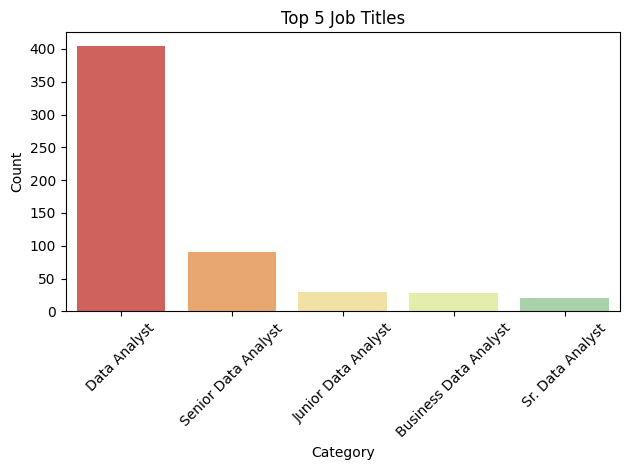

In [35]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'to_plot' is already created as shown earlier:
# to_plot = data['Job Title'].value_counts().head(5).reset_index()
# to_plot.columns = ['Category', 'Count']

# Plot
sns.barplot(x='Category', y='Count', data=to_plot, palette=sns.color_palette('Spectral'))
plt.title("Top 5 Job Titles")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Index(['id', 'Job Title', 'Salary Estimate', 'Job Description', 'Rating',
       'Company Name', 'Location', 'Headquarters', 'Size', 'Founded',
       'Type of ownership', 'Industry', 'Sector', 'Revenue', 'Competitors',
       'Easy Apply'],
      dtype='object')


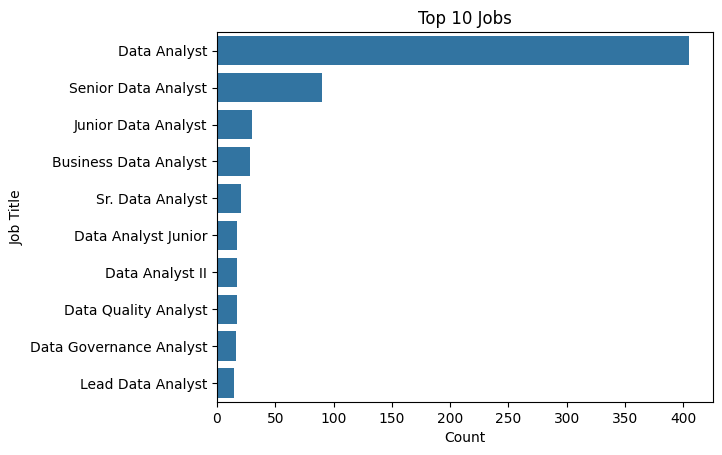

In [16]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load dataset
data = pd.read_csv(r"C:\Users\Sandhya\OneDrive\Desktop\Data Analyst Job Analysis\DataAnalyst.csv")

# Clean column names by stripping spaces
data.columns = data.columns.str.strip()

# Check the columns
print(data.columns)

# Get top 10 most common job titles (adjust the column name based on your output)
top_jobs = data['Job Title'].value_counts().head(10)

# Plotting the bar plot
sns.barplot(x=top_jobs.values, y=top_jobs.index)
plt.xlabel('Count')
plt.ylabel('Job Title')
plt.title('Top 10 Jobs')
plt.show()


In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import re

import plotly.graph_objects as go
import plotly.express as px
from plotly.subplots import make_subplots

warnings.filterwarnings('ignore')


In [12]:
data_analyst_jobs = pd.read_csv(r'C:\Users\Sandhya\OneDrive\Desktop\Data Analyst Job Analysis\DataAnalyst.csv')


In [17]:
print(data_analyst_jobs.columns)

Index(['id', 'Job Title', 'Salary Estimate', 'Job Description', 'Rating',
       'Company Name', 'Location', 'Headquarters', 'Size', 'Founded',
       'Type of ownership', 'Industry', 'Sector', 'Revenue', 'Competitors',
       'Easy Apply'],
      dtype='object')


In [18]:
# Drop columns if they exist
data_analyst_jobs = data_analyst_jobs.drop(['Unnamed: 0', 'Founded', 'Competitors'], axis=1, errors='ignore')

# Print dataset summary
print(f'Number of rows: {data_analyst_jobs.shape[0]}; '
      f'Number of columns: {data_analyst_jobs.shape[1]}; '
      f'Number of missing values: {data_analyst_jobs.isna().sum().sum()}')


Number of rows: 2253; Number of columns: 14; Number of missing values: 1


In [20]:
# Renaming columns for better analysis
data_analyst_jobs.rename(columns={
    "Job Title": "job_title",
    "Salary Estimate": "salary_estimate",
    "Job Description": "job_description",
    "Company Name": "company_name",
    "Location": "location",
    "Headquarters": "headquarters",
    "Size": "size",
    "Type of ownership": "type_of_ownership",
    "Industry": "industry",
    "Sector": "sector",
    "Revenue": "revenue",
    "EasyApply": "easy_apply"
}, inplace=True)


In [22]:
# Changing Salary column to int for better calculation
data_analyst_jobs[['MinSalary', 'MaxSalary']] = data_analyst_jobs['salary_estimate'].str.extract(r'\$(\d+)K-\$(\d+)K')

# Convert extracted salary values to numeric
data_analyst_jobs['MinSalary'] = pd.to_numeric(data_analyst_jobs['MinSalary'])
data_analyst_jobs['MaxSalary'] = pd.to_numeric(data_analyst_jobs['MaxSalary'])
data_analyst_jobs['AvgSalary'] = (data_analyst_jobs['MinSalary'] + data_analyst_jobs['MaxSalary']) / 2

In [23]:
# Changing salary columns to float
data_analyst_jobs['MinSalary'] = data_analyst_jobs['MinSalary'].astype(float)
data_analyst_jobs['MaxSalary'] = data_analyst_jobs['MaxSalary'].astype(float)

# Calculating average salary
data_analyst_jobs['average_salary'] = (data_analyst_jobs['MinSalary'] + data_analyst_jobs['MaxSalary']) / 2

# Dropping unneeded columns
data_analyst_jobs.drop(['salary_estimate', 'MinSalary', 'MaxSalary'], axis=1, inplace=True)


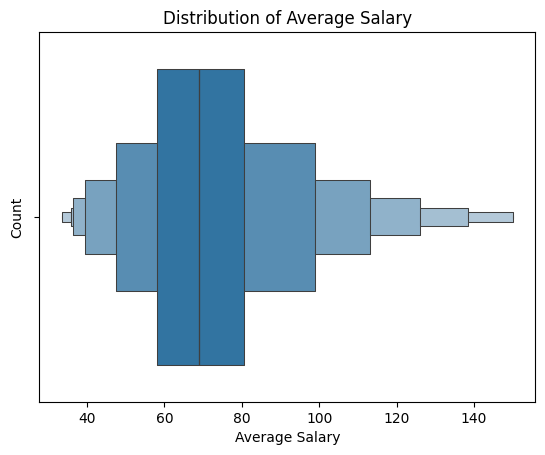

In [25]:
# Average Salary Distribution
import seaborn as sns
import matplotlib.pyplot as plt

sns.boxenplot(data=data_analyst_jobs, x='average_salary')
plt.xlabel('Average Salary')
plt.ylabel('Count')
plt.title('Distribution of Average Salary')
plt.show()


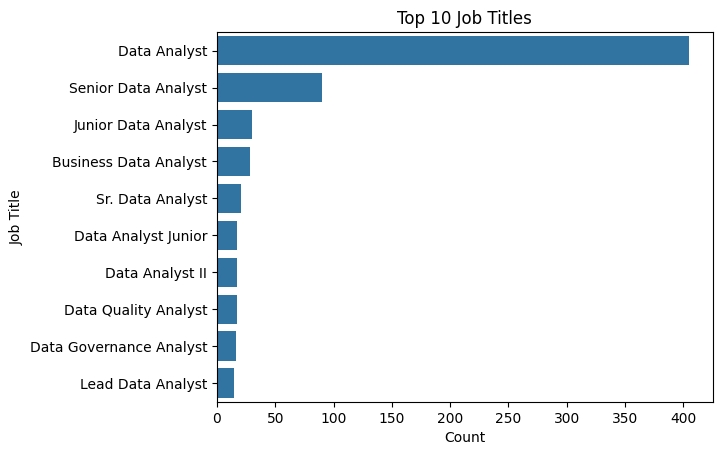

In [26]:
# Top 10 Job Titles
top_jobs = data_analyst_jobs['job_title'].value_counts().head(10)

import seaborn as sns
import matplotlib.pyplot as plt

sns.barplot(x=top_jobs.values, y=top_jobs.index)
plt.xlabel('Count')
plt.ylabel('Job Title')
plt.title('Top 10 Job Titles')
plt.show()


['id', 'job_title', 'salary_estimate', 'job_description', 'rating', 'company_name', 'location', 'headquarters', 'size', 'founded', 'type_of_ownership', 'industry', 'sector', 'revenue', 'competitors', 'easy_apply']


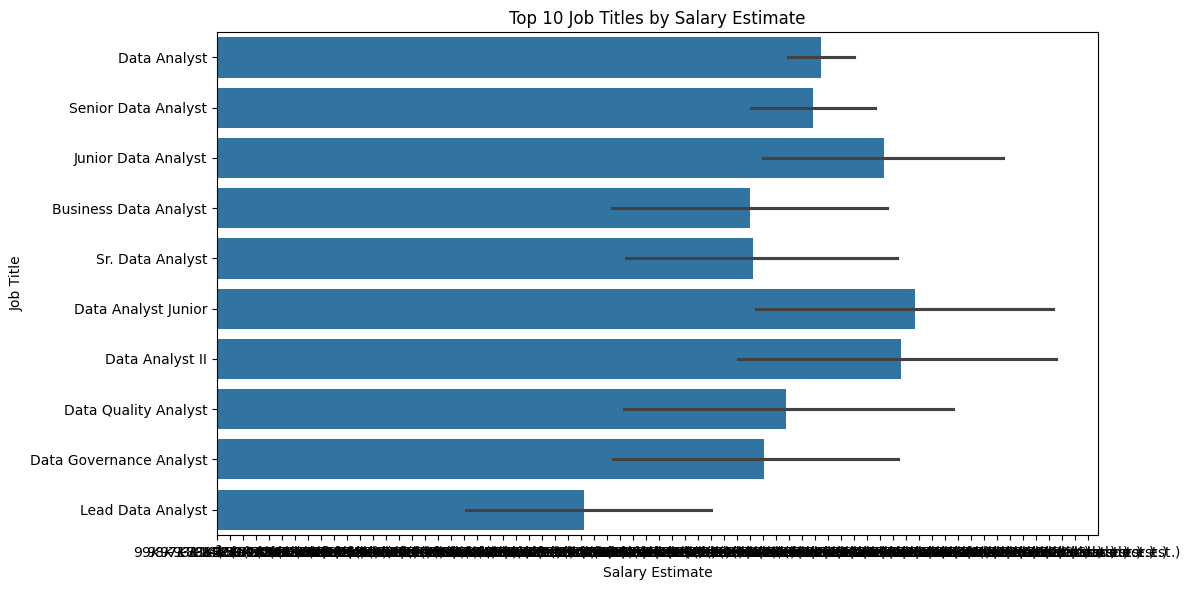

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
data_analyst_jobs = pd.read_csv(r'C:\Users\Sandhya\OneDrive\Desktop\Data Analyst Job Analysis\DataAnalyst.csv')

# Normalize column names
data_analyst_jobs.columns = data_analyst_jobs.columns.str.strip().str.lower().str.replace(" ", "_")
print(data_analyst_jobs.columns.tolist())  # <-- Inspect available columns

# Replace 'salary_estimate' with the actual column name you find
data_analyst_jobs_sorted = data_analyst_jobs.sort_values(by='salary_estimate', ascending=False)

# Plot
plt.figure(figsize=(12, 6))
sns.barplot(
    x='salary_estimate',
    y='job_title',
    data=data_analyst_jobs_sorted,
    orient='h',
    order=data_analyst_jobs_sorted['job_title'].value_counts().head(10).index
)
plt.title('Top 10 Job Titles by Salary Estimate')
plt.xlabel('Salary Estimate')
plt.ylabel('Job Title')
plt.tight_layout()
plt.show()


In [9]:
import pandas as pd
import numpy as np

# Clean column names
data_analyst_jobs.columns = data_analyst_jobs.columns.str.strip().str.lower().str.replace(" ", "_")

# Remove non-numeric characters and calculate average salary
def extract_avg_salary(s):
    try:
        # Keep only the part before any parentheses
        s = s.split('(')[0]
        # Remove $ and K
        s = s.replace('$', '').replace('K', '')
        # Split the range
        parts = s.split('-')
        if len(parts) == 2:
            low = int(parts[0])
            high = int(parts[1])
            return (low + high) / 2 * 1000  # convert to actual dollars
        elif len(parts) == 1:
            return int(parts[0]) * 1000
    except:
        return np.nan

data_analyst_jobs['average_salary'] = data_analyst_jobs['salary_estimate'].apply(extract_avg_salary)

# Now you can group and compute mean salary by location
job_location = data_analyst_jobs.groupby('location')["average_salary"].mean().reset_index()
top_10 = job_location.sort_values(by="average_salary", ascending=False).head(10)

print(top_10)


                  location  average_salary
155             Newark, CA   150000.000000
56           Daly City, CA   126000.000000
138         Marin City, CA   126000.000000
134          Los Gatos, CA   122666.666667
178        Pico Rivera, CA   122500.000000
246           Whittier, CA   122500.000000
19            Berkeley, CA   115500.000000
163         Northfield, IL   113000.000000
68   Elk Grove Village, IL   113000.000000
92            Glenview, IL   113000.000000


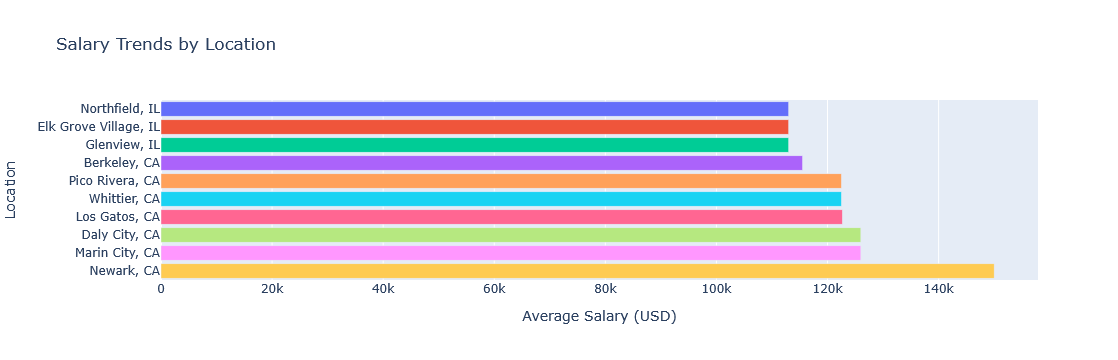

In [11]:
import plotly.express as px

# Create a horizontal bar chart with sorted values
fig = px.bar(
    top_10.sort_values(by='average_salary', ascending=True),  # sort for better horizontal display
    x='average_salary',
    y='location',
    orientation='h',
    title='Salary Trends by Location',
    color='location'
)

# Update layout
fig.update_layout(
    xaxis_title='Average Salary (USD)',
    yaxis_title='Location',
    showlegend=False
)

# Show the figure
fig.show()


C:\Users\Sandhya\AppData\Local\Temp\ipykernel_16940\3683479518.py:5: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




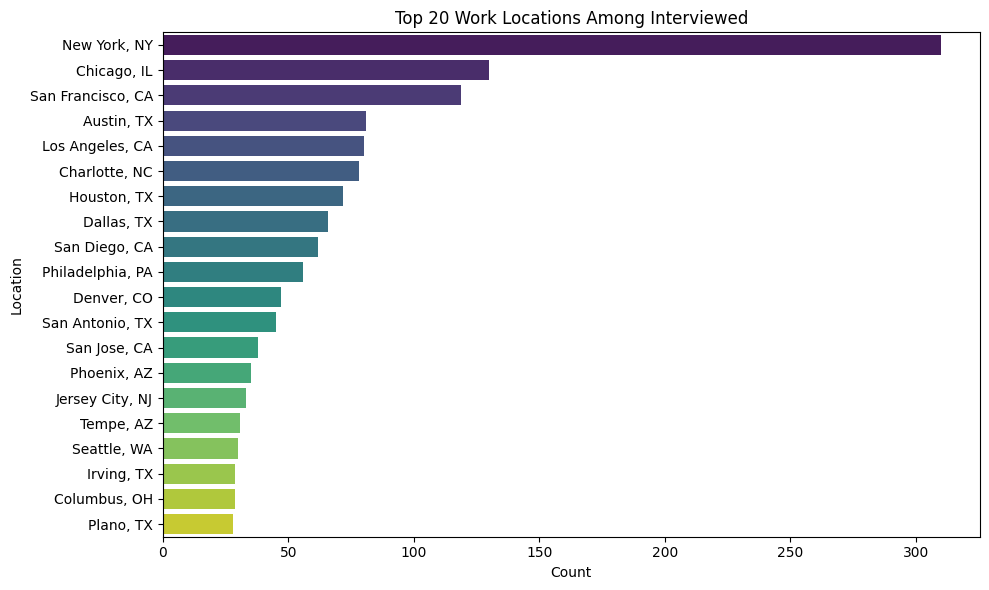

In [13]:
# Top work locations among interviewed
top_locations = data_analyst_jobs['location'].value_counts().head(20)

plt.figure(figsize=(10, 6))
sns.barplot(x=top_locations.values, y=top_locations.index, palette='viridis')
plt.xlabel('Count')
plt.ylabel('Location')
plt.title('Top 20 Work Locations Among Interviewed')
plt.tight_layout()
plt.show()


C:\Users\Sandhya\AppData\Local\Temp\ipykernel_16940\2167791687.py:10: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




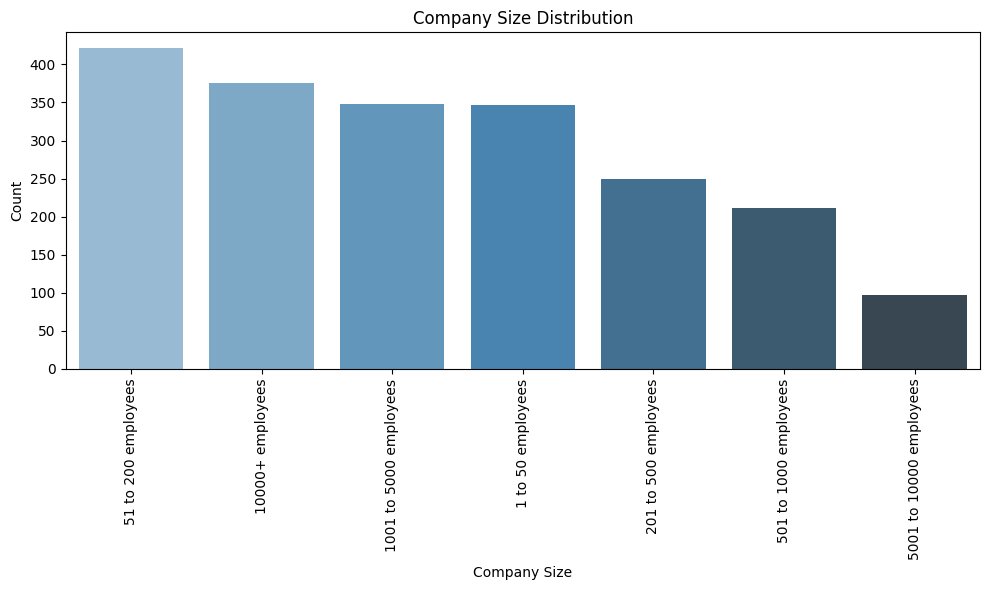

In [14]:
# Companies by Amount of Employees
filtered_size = data_analyst_jobs[
    (data_analyst_jobs['size'] != '-1') & 
    (data_analyst_jobs['size'] != 'Unknown')
]

data_analyst_jobs_size = filtered_size['size'].value_counts().head(20)

plt.figure(figsize=(10, 6))
sns.barplot(x=data_analyst_jobs_size.index, y=data_analyst_jobs_size.values, palette='Blues_d')
plt.xlabel('Company Size')
plt.ylabel('Count')
plt.title('Company Size Distribution')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


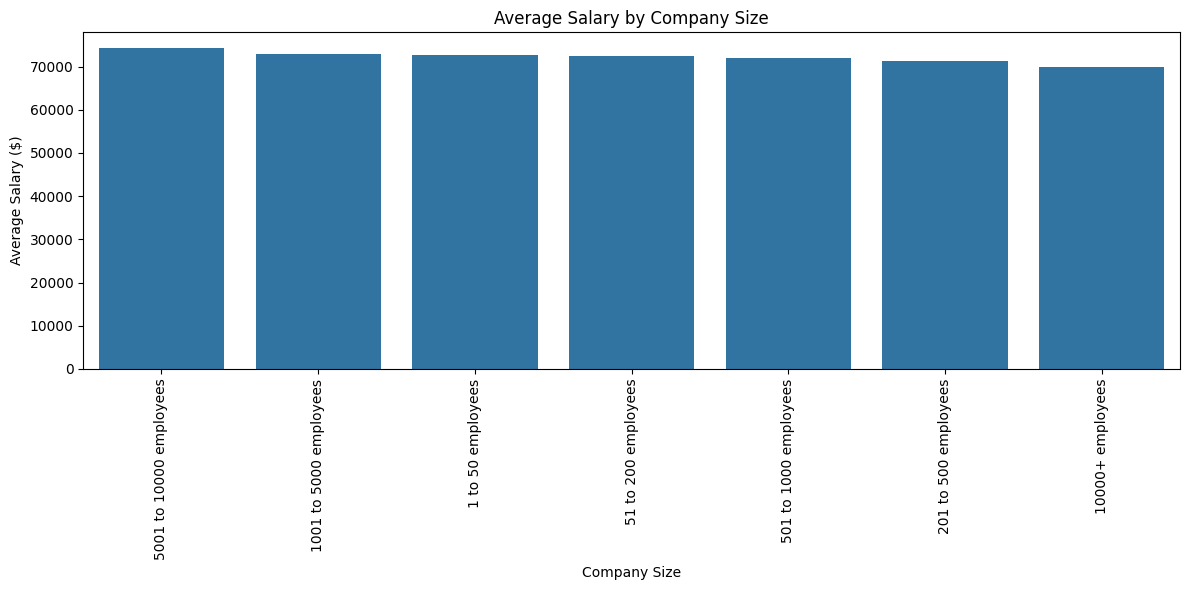

In [15]:
# Salary by Company Size
data_analyst_jobs_filtered = data_analyst_jobs[
    (data_analyst_jobs['size'] != '-1') & 
    (data_analyst_jobs['size'] != 'Unknown')
]

data_analyst_jobs_sizeXsalary = data_analyst_jobs_filtered.groupby('size')['average_salary'].mean().reset_index()

# Sort the DataFrame by 'average_salary' in descending order
data_analyst_jobs_sizeXsalary = data_analyst_jobs_sizeXsalary.sort_values(by='average_salary', ascending=False)

# Plot the bar chart
plt.figure(figsize=(12, 6))
sns.barplot(x='size', y='average_salary', data=data_analyst_jobs_sizeXsalary)
plt.xlabel('Company Size')
plt.ylabel('Average Salary ($)')
plt.title('Average Salary by Company Size')
plt.xticks(rotation=90)
plt.tight_layout()  # Ensures everything fits without clipping
plt.show()


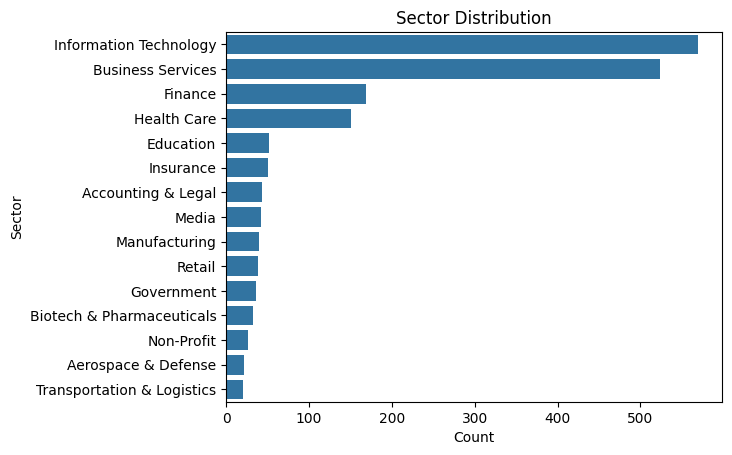

In [16]:
#Top 5 Sectors Distribution Where Data Analyst Jobs are available
# Sector Distribution
data_analyst_jobs_sector = data_analyst_jobs[
    data_analyst_jobs['sector'] != '-1'
]['sector'].value_counts().head(15)

sns.barplot(x=data_analyst_jobs_sector.values, y=data_analyst_jobs_sector.index)
plt.xlabel('Count')
plt.ylabel('Sector')
plt.title('Sector Distribution')
plt.show()


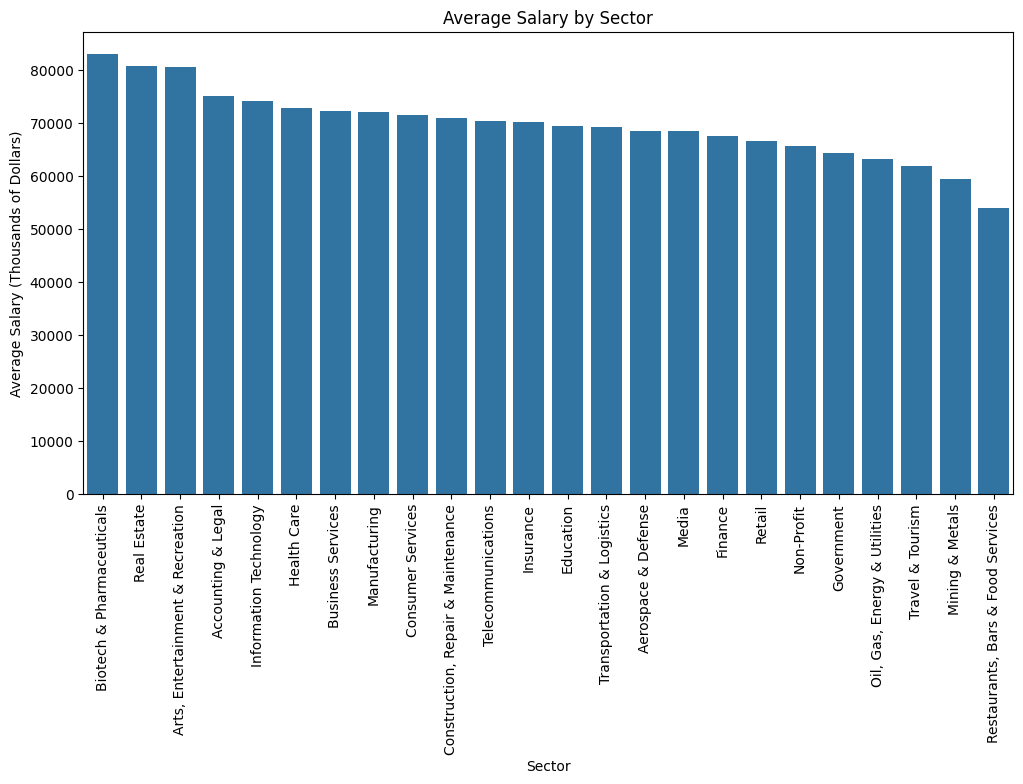

In [17]:
#Top Sectors in Correlation with Average Salary
# Salary by Sector
average_salary_by_sector = data_analyst_jobs[
    data_analyst_jobs['sector'] != '-1'
].groupby('sector')['average_salary'].mean().reset_index()

average_salary_by_sector = average_salary_by_sector.sort_values(by='average_salary', ascending=False)

plt.figure(figsize=(12, 6))
sns.barplot(x='sector', y='average_salary', data=average_salary_by_sector)
plt.xticks(rotation=90)
plt.xlabel('Sector')
plt.ylabel('Average Salary (Thousands of Dollars)')
plt.title('Average Salary by Sector')
plt.show()
